In [11]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor

In [13]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


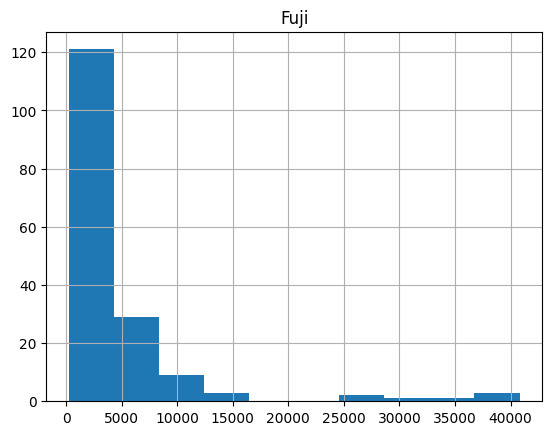

In [14]:
data = df[['Fuji']]
data.hist();

## window shift 26 columns

In [15]:
seq_df = window_input_output(26, 26, data)
seq_df

,Fuji,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
51,2854,3262.0,3155.0,8060.0,11715.0,5729.0,3356.0,9326.0,6277.0,6321.0,...,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0,32539.0,15071.0,6917.0
52,4241,2854.0,3262.0,3155.0,8060.0,11715.0,5729.0,3356.0,9326.0,6277.0,...,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0,32539.0,15071.0
53,10785,4241.0,2854.0,3262.0,3155.0,8060.0,11715.0,5729.0,3356.0,9326.0,...,8035.0,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0,32539.0
54,3670,10785.0,4241.0,2854.0,3262.0,3155.0,8060.0,11715.0,5729.0,3356.0,...,8344.0,8035.0,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0,8412.0
55,5040,3670.0,10785.0,4241.0,2854.0,3262.0,3155.0,8060.0,11715.0,5729.0,...,6633.0,8344.0,8035.0,27507.0,26156.0,11650.0,6082.0,7062.0,7175.0,10710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,751,598.0,639.0,497.0,551.0,687.0,839.0,939.0,483.0,528.0,...,13319.0,3402.0,2126.0,2802.0,2019.0,2010.0,1678.0,1632.0,2308.0,3586.0
165,589,751.0,598.0,639.0,497.0,551.0,687.0,839.0,939.0,483.0,...,7368.0,13319.0,3402.0,2126.0,2802.0,2019.0,2010.0,1678.0,1632.0,2308.0
166,640,589.0,751.0,598.0,639.0,497.0,551.0,687.0,839.0,939.0,...,4244.0,7368.0,13319.0,3402.0,2126.0,2802.0,2019.0,2010.0,1678.0,1632.0
167,797,640.0,589.0,751.0,598.0,639.0,497.0,551.0,687.0,839.0,...,2438.0,4244.0,7368.0,13319.0,3402.0,2126.0,2802.0,2019.0,2010.0,1678.0


## Split data

In [16]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Fuji')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [17]:
model = MultiOutputRegressor(OneVsRestClassifier(SVR(kernel='rbf')))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Fuji):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Fuji):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Fuji): 61253874.97115385
Mean Absolute Error (Fuji): 3320.8365384615386
R-squared (Test score) -35.69056304723166
Train score 0.9992700643103267


## Visualization

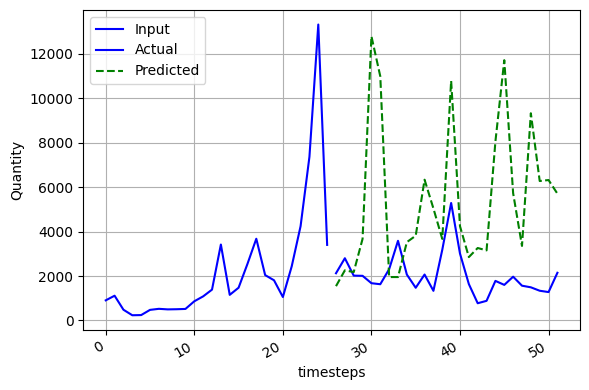

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 26, 1), X_test.iloc[1, ], 'b-', label='Input')
ax.plot(np.arange(26, 52, 1), y_test.iloc[1, ], color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

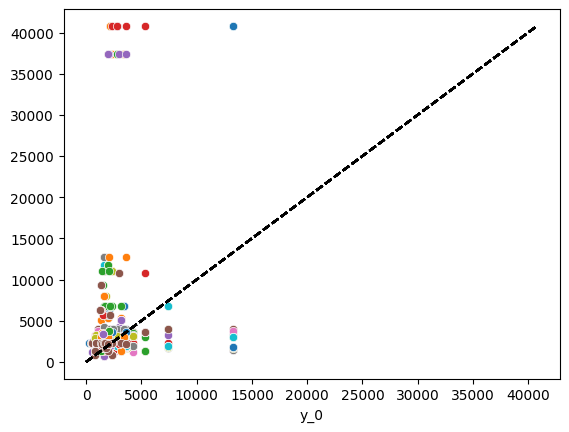

In [20]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')